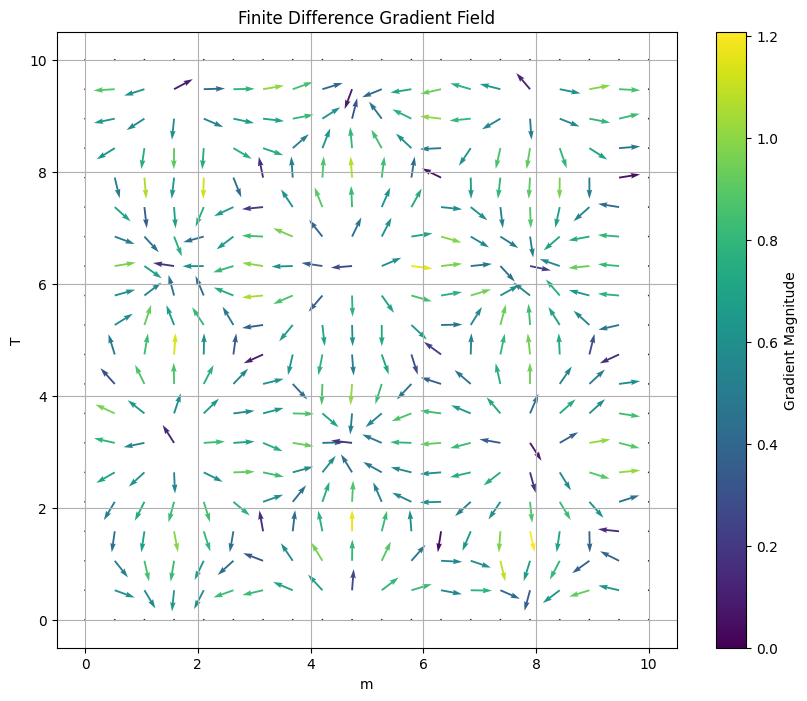

GP Gradient at (m=5.0, T=5.0): [ 0.08453959 -0.85963285]
Finite Difference Gradient at (m=5.0, T=5.0): [0.12038383248646686, -0.6623119594957355]


In [ ]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
np.random.seed(42)
m_values = np.linspace(0, 10, 20)
T_values = np.linspace(0, 10, 20)
M, T = np.meshgrid(m_values, T_values)

# Example function with noise
true_function = lambda m, T: np.sin(m) * np.cos(T) + 0.1 * np.random.normal(size=m.shape)
data = true_function(M, T)

# Flatten for GP training
train_X = torch.tensor(np.column_stack((M.ravel(), T.ravel())), dtype=torch.float32)
train_y = torch.tensor(data.ravel(), dtype=torch.float32)

### --- Method 1: Gaussian Process with GPyTorch --- ###

# Define a simple GP model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_X, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_X, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize model and likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, likelihood)

# Training
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_X)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Evaluation Mode
model.eval()
likelihood.eval()

def compute_gp_gradient(model, m, T):
    x = torch.tensor([[m, T]], dtype=torch.float32, requires_grad=True)
    output = model(x)
    grad_outputs = torch.ones_like(output.mean)
    gradient = torch.autograd.grad(output.mean, x, grad_outputs=grad_outputs, create_graph=True)[0]
    return gradient.detach().numpy().flatten()

### --- Method 2: Finite Differences --- ###

def finite_difference_gradient(m_values, T_values, data):
    grad_m = np.zeros_like(data)
    grad_T = np.zeros_like(data)
    
    # Calculate gradients using central differences
    for i in range(1, len(m_values) - 1):
        for j in range(1, len(T_values) - 1):
            dm = m_values[i+1] - m_values[i-1]
            dT = T_values[j+1] - T_values[j-1]
            
            grad_m[j, i] = (data[j, i+1] - data[j, i-1]) / dm
            grad_T[j, i] = (data[j+1, i] - data[j-1, i]) / dT
            
    return grad_m, grad_T

# Compute the finite difference gradients
grad_m_fd, grad_T_fd = finite_difference_gradient(m_values, T_values, data)

### --- Visualization Function --- ###
def plot_gradient_field(m_values, T_values, grad_m, grad_T, title="Gradient Field"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    
    # Normalize for visualization
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))
    plt.quiver(M, T, norm_grad_m, norm_grad_T, magnitude, cmap='viridis')
    plt.colorbar(label='Gradient Magnitude')
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example Visualization
plot_gradient_field(m_values, T_values, grad_m_fd, grad_T_fd, title="Finite Difference Gradient Field")

### --- Example Usage --- ###
m_sample, T_sample = 5.0, 5.0

# Compute gradient using GP
gp_gradient = compute_gp_gradient(model, m_sample, T_sample)
print(f"GP Gradient at (m={m_sample}, T={T_sample}): {gp_gradient}")

# Compute gradient using finite differences
fd_grad_m = np.interp(m_sample, m_values, grad_m_fd[:, 10])
fd_grad_T = np.interp(T_sample, T_values, grad_T_fd[10, :])
print(f"Finite Difference Gradient at (m={m_sample}, T={T_sample}): [{fd_grad_m}, {fd_grad_T}]")

# Plot

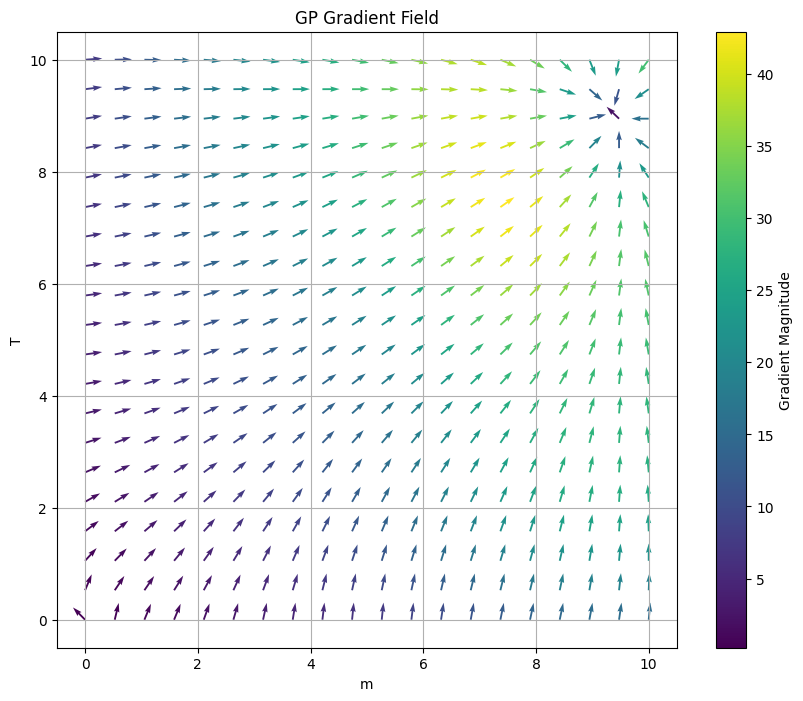

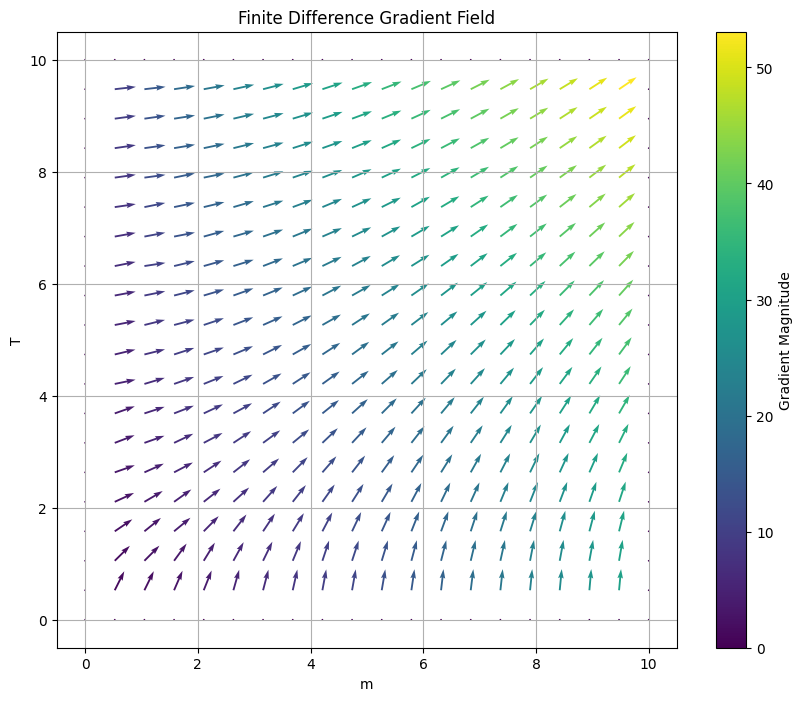

In [ ]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
np.random.seed(42)
m_values = np.linspace(0, 10, 20)
T_values = np.linspace(0, 10, 20)
M, T = np.meshgrid(m_values, T_values)

# Example function with noise
true_function = lambda m, T: m**1.5 * T  + 0.2*m + 0.8*T  + 0.1 * np.random.normal(size=m.shape)
data = true_function(M, T)

# Flatten for GP training
train_X = torch.tensor(np.column_stack((M.ravel(), T.ravel())), dtype=torch.float32)
train_y = torch.tensor(data.ravel(), dtype=torch.float32)

### --- Method 1: Gaussian Process with GPyTorch --- ###

# Define a simple GP model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_X, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_X, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize model and likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, likelihood)

# Training
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_X)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Evaluation Mode
model.eval()
likelihood.eval()

def compute_gp_gradient_field(model, m_values, T_values):
    M, T = np.meshgrid(m_values, T_values)
    grad_m = np.zeros_like(M)
    grad_T = np.zeros_like(T)

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            x = torch.tensor([[M[j, i], T[j, i]]], dtype=torch.float32, requires_grad=True)
            output = model(x)
            grad_outputs = torch.ones_like(output.mean)
            gradient = torch.autograd.grad(output.mean, x, grad_outputs=grad_outputs, create_graph=True)[0]
            grad_m[j, i], grad_T[j, i] = gradient.detach().numpy().flatten()

    return grad_m, grad_T

# Compute the GP gradient field
grad_m_gp, grad_T_gp = compute_gp_gradient_field(model, m_values, T_values)

### --- Method 2: Finite Differences --- ###

def finite_difference_gradient(m_values, T_values, data):
    grad_m = np.zeros_like(data)
    grad_T = np.zeros_like(data)
    
    # Calculate gradients using central differences
    for i in range(1, len(m_values) - 1):
        for j in range(1, len(T_values) - 1):
            dm = m_values[i+1] - m_values[i-1]
            dT = T_values[j+1] - T_values[j-1]
            
            grad_m[j, i] = (data[j, i+1] - data[j, i-1]) / dm
            grad_T[j, i] = (data[j+1, i] - data[j-1, i]) / dT
            
    return grad_m, grad_T

# Compute the finite difference gradients
grad_m_fd, grad_T_fd = finite_difference_gradient(m_values, T_values, data)

### --- Visualization Function --- ###
def plot_gradient_field(m_values, T_values, grad_m, grad_T, title="Gradient Field"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    
    # Normalize for visualization
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))
    plt.quiver(M, T, norm_grad_m, norm_grad_T, magnitude, cmap='viridis')
    plt.colorbar(label='Gradient Magnitude')
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the GP Gradient Field
plot_gradient_field(m_values, T_values, grad_m_gp, grad_T_gp, title="GP Gradient Field")

# Visualize the Finite Difference Gradient Field
plot_gradient_field(m_values, T_values, grad_m_fd, grad_T_fd, title="Finite Difference Gradient Field")


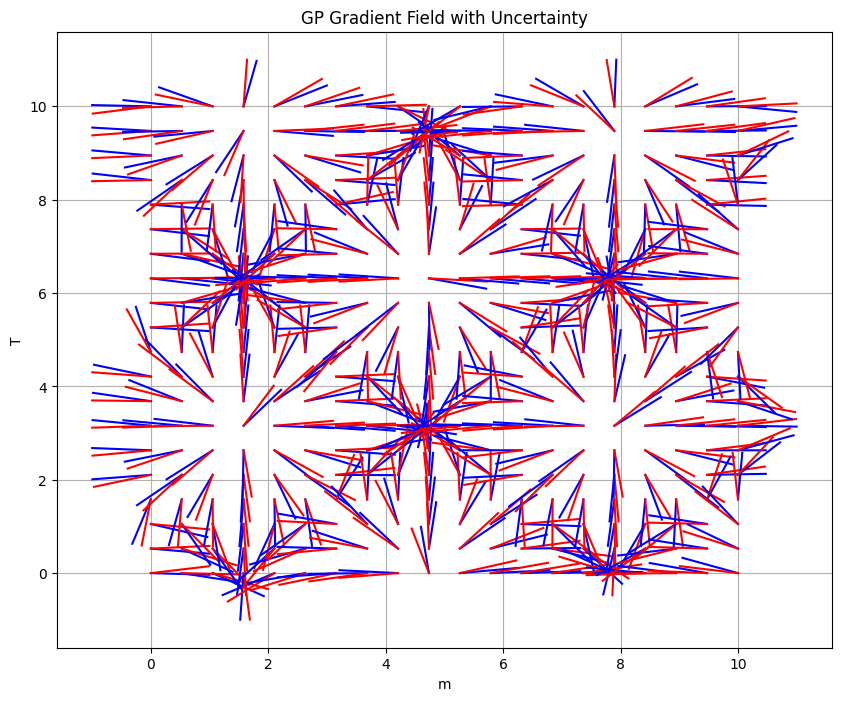

In [ ]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
np.random.seed(42)
m_values = np.linspace(0, 10, 20)
T_values = np.linspace(0, 10, 20)
M, T = np.meshgrid(m_values, T_values)

# Example function with noise
true_function = lambda m, T: np.sin(m) * np.cos(T) + 0.1 * np.random.normal(size=m.shape)
data = true_function(M, T)

# Flatten for GP training
train_X = torch.tensor(np.column_stack((M.ravel(), T.ravel())), dtype=torch.float32)
train_y = torch.tensor(data.ravel(), dtype=torch.float32)

### --- Method 1: Gaussian Process with GPyTorch --- ###

# Define a simple GP model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_X, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_X, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize model and likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, likelihood)

# Training
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_X)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Evaluation Mode
model.eval()
likelihood.eval()

def compute_gp_gradient_field(model, m_values, T_values):
    M, T = np.meshgrid(m_values, T_values)
    grad_m = np.zeros_like(M)
    grad_T = np.zeros_like(T)
    uncertainty = np.zeros_like(T)

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            x = torch.tensor([[M[j, i], T[j, i]]], dtype=torch.float32, requires_grad=True)
            output = model(x)
            grad_outputs = torch.ones_like(output.mean)
            gradient = torch.autograd.grad(output.mean, x, grad_outputs=grad_outputs, create_graph=True)[0]
            grad_m[j, i], grad_T[j, i] = gradient.detach().numpy().flatten()

            # Estimate uncertainty from the GP model
            with torch.no_grad():
                pred = likelihood(model(x))
                std_dev = pred.stddev.item()
                uncertainty[j, i] = std_dev

    return grad_m, grad_T, uncertainty

# Compute the GP gradient field with uncertainty
grad_m_gp, grad_T_gp, uncertainty_gp = compute_gp_gradient_field(model, m_values, T_values)

### --- Method 2: Finite Differences --- ###

def finite_difference_gradient(m_values, T_values, data):
    grad_m = np.zeros_like(data)
    grad_T = np.zeros_like(data)
    
    # Calculate gradients using central differences
    for i in range(1, len(m_values) - 1):
        for j in range(1, len(T_values) - 1):
            dm = m_values[i+1] - m_values[i-1]
            dT = T_values[j+1] - T_values[j-1]
            
            grad_m[j, i] = (data[j, i+1] - data[j, i-1]) / dm
            grad_T[j, i] = (data[j+1, i] - data[j-1, i]) / dT
            
    return grad_m, grad_T

# Compute the finite difference gradients
grad_m_fd, grad_T_fd = finite_difference_gradient(m_values, T_values, data)

### --- Visualization Function for Cones --- ###
def plot_cone_field(m_values, T_values, grad_m, grad_T, uncertainty, title="GP Gradient Field with Uncertainty"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    
    # Normalize for visualization
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    # Define cone angles proportional to uncertainty
    angle_spread = np.clip(uncertainty * np.pi / 4, 0, np.pi / 2)

    plt.figure(figsize=(10, 8))
    for i in range(len(m_values)):
        for j in range(len(T_values)):
            dx = norm_grad_m[j, i]
            dy = norm_grad_T[j, i]
            angle1 = np.arctan2(dy, dx) - angle_spread[j, i]
            angle2 = np.arctan2(dy, dx) + angle_spread[j, i]
            
            plt.plot([M[j, i], M[j, i] + np.cos(angle1)], [T[j, i], T[j, i] + np.sin(angle1)], color='blue')
            plt.plot([M[j, i], M[j, i] + np.cos(angle2)], [T[j, i], T[j, i] + np.sin(angle2)], color='red')
    
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the Cone Plot for GP Gradients
plot_cone_field(m_values, T_values, grad_m_gp, grad_T_gp, uncertainty_gp)


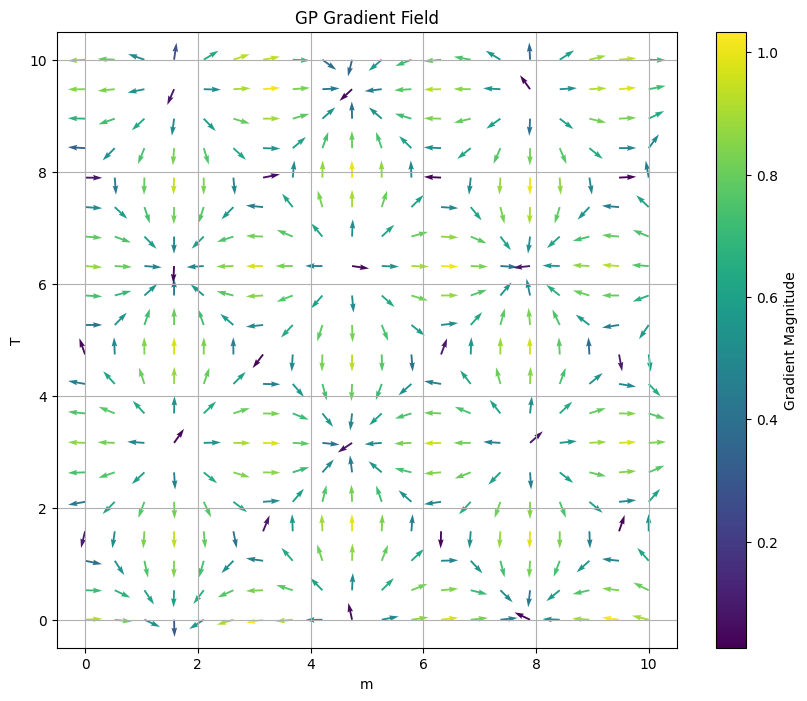

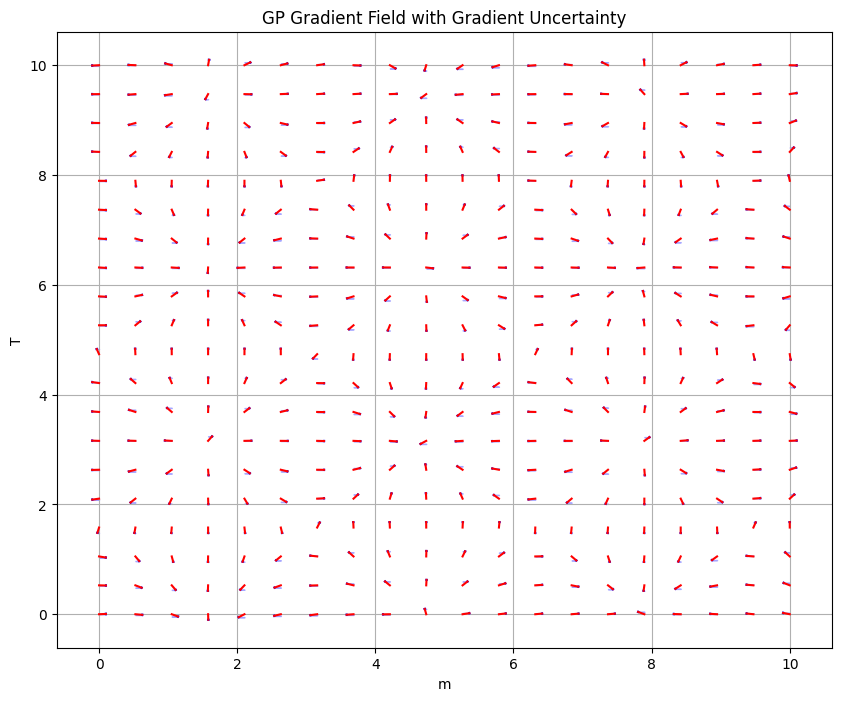

In [ ]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
np.random.seed(42)
m_values = np.linspace(0, 10, 20)
T_values = np.linspace(0, 10, 20)
M, T = np.meshgrid(m_values, T_values)

# Example function with noise
true_function = lambda m, T: np.sin(m) * np.cos(T) + 0.1 * np.random.normal(size=m.shape)
data = true_function(M, T)

# Flatten for GP training
train_X = torch.tensor(np.column_stack((M.ravel(), T.ravel())), dtype=torch.float32)
train_y = torch.tensor(data.ravel(), dtype=torch.float32)

### --- Method 1: Gaussian Process with GPyTorch --- ###

# Define a simple GP model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_X, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_X, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize model and likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, likelihood)

# Training
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_X)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Evaluation Mode
model.eval()
likelihood.eval()

def compute_gp_gradient_field(model, m_values, T_values):
    M, T = np.meshgrid(m_values, T_values)
    grad_m = np.zeros_like(M)
    grad_T = np.zeros_like(T)
    grad_uncertainty = np.zeros_like(T)

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            x = torch.tensor([[M[j, i], T[j, i]]], dtype=torch.float32, requires_grad=True)
            output = model(x)
            mean = output.mean
            covar = output.covariance_matrix

            # Compute gradients
            grad_outputs = torch.ones_like(mean)
            gradient = torch.autograd.grad(mean, x, grad_outputs=grad_outputs, create_graph=True)[0]
            grad_m[j, i], grad_T[j, i] = gradient.detach().numpy().flatten()

            # Compute uncertainty using covariance matrix
            grad_uncertainty[j, i] = torch.sqrt(torch.trace(covar)).item()

    return grad_m, grad_T, grad_uncertainty

# Compute the GP gradient field with uncertainty
grad_m_gp, grad_T_gp, grad_uncertainty_gp = compute_gp_gradient_field(model, m_values, T_values)

### --- Visualization Function for Arrows --- ###
def plot_gradient_field(m_values, T_values, grad_m, grad_T, title="Gradient Field"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    
    # Normalize for visualization
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))
    plt.quiver(M, T, norm_grad_m, norm_grad_T, magnitude, cmap='viridis')
    plt.colorbar(label='Gradient Magnitude')
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the GP Gradient Field
plot_gradient_field(m_values, T_values, grad_m_gp, grad_T_gp, title="GP Gradient Field")

### --- Visualization Function for Cones with Gradient Uncertainty --- ###
def plot_cone_field(m_values, T_values, grad_m, grad_T, uncertainty, title="GP Gradient Field with Gradient Uncertainty"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            dx, dy = norm_grad_m[j, i], norm_grad_T[j, i]
            angle = np.arctan2(dy, dx)
            spread = uncertainty[j, i] * np.pi / 4  # Scale uncertainty to angle spread
            
            arc_angles = np.linspace(angle - spread, angle + spread, 50)
            arc_x = np.cos(arc_angles) * 0.1
            arc_y = np.sin(arc_angles) * 0.1
            
            plt.plot(M[j, i] + arc_x, T[j, i] + arc_y, color='blue')
            plt.plot([M[j, i], M[j, i] + dx * 0.1], [T[j, i], T[j, i] + dy * 0.1], color='red')
            plt.fill_betweenx(T[j, i] + arc_y, M[j, i], M[j, i] + arc_x, color='blue', alpha=0.3)
    
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the Cone Plot for GP Gradient Uncertainty
plot_cone_field(m_values, T_values, grad_m_gp, grad_T_gp, grad_uncertainty_gp)


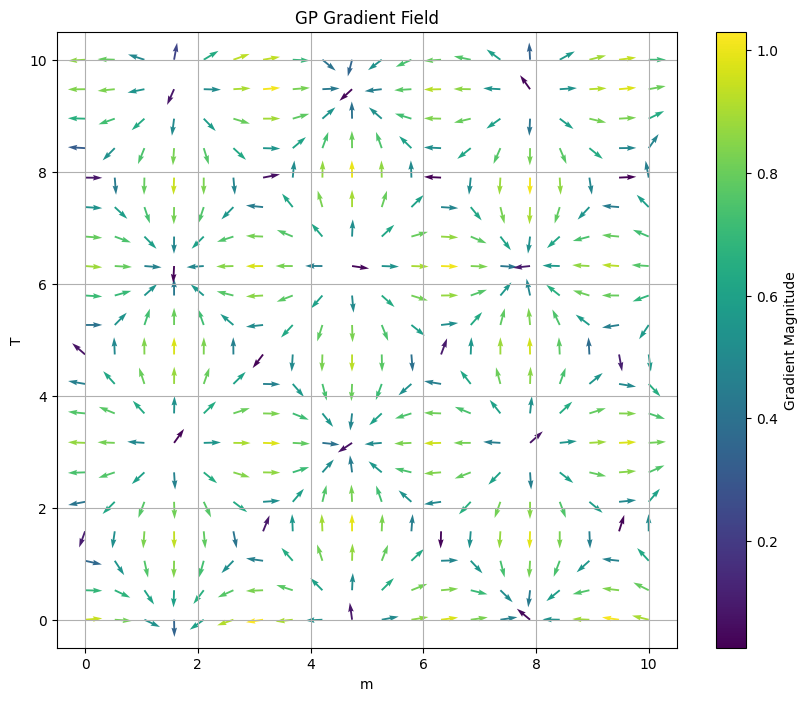

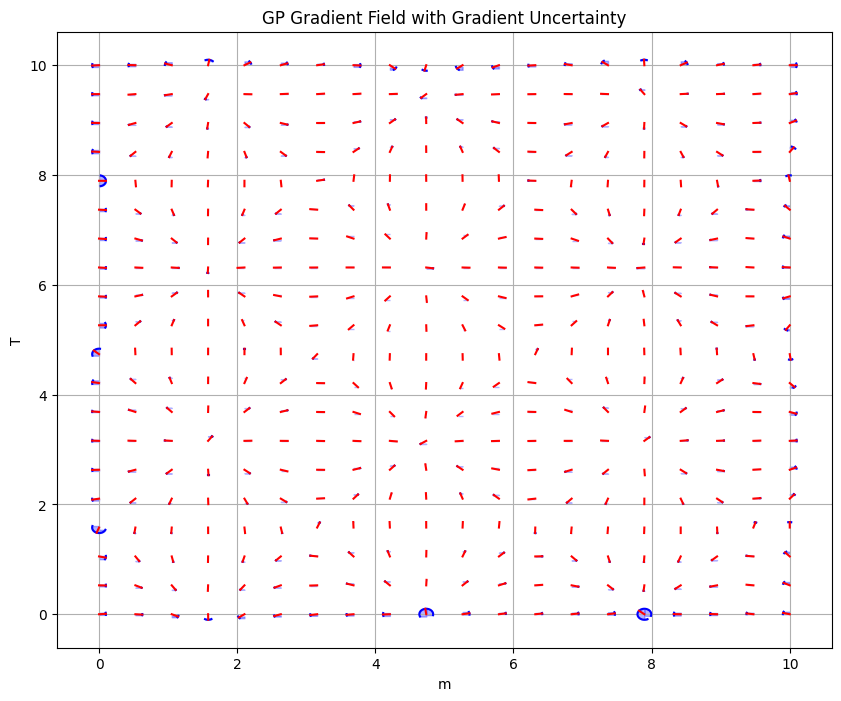

In [ ]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
np.random.seed(42)
m_values = np.linspace(0, 10, 20)
T_values = np.linspace(0, 10, 20)
M, T = np.meshgrid(m_values, T_values)

# Example function with noise
true_function = lambda m, T: np.sin(m) * np.cos(T) + 0.1 * np.random.normal(size=m.shape)
data = true_function(M, T)

# Flatten for GP training
train_X = torch.tensor(np.column_stack((M.ravel(), T.ravel())), dtype=torch.float32)
train_y = torch.tensor(data.ravel(), dtype=torch.float32)

### --- Method 1: Gaussian Process with GPyTorch --- ###

# Define a simple GP model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_X, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_X, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize model and likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, likelihood)

# Training
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_X)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Evaluation Mode
model.eval()
likelihood.eval()

def compute_gp_gradient_field(model, m_values, T_values, num_samples=10):
    M, T = np.meshgrid(m_values, T_values)
    grad_m = np.zeros_like(M)
    grad_T = np.zeros_like(T)
    grad_uncertainty_m = np.zeros_like(T)
    grad_uncertainty_T = np.zeros_like(T)

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            x = torch.tensor([[M[j, i], T[j, i]]], dtype=torch.float32, requires_grad=True)
            posterior = model(x)
            samples = posterior.rsample(sample_shape=torch.Size([num_samples]))

            # Compute gradients for each sample
            gradients = []
            for sample in samples:
                sample.backward(retain_graph=True)
                gradient = x.grad.clone().detach().numpy().flatten()
                gradients.append(gradient)
                x.grad.zero_()

            gradients = np.array(gradients)

            # Calculate mean gradient and uncertainties (95% confidence interval)
            grad_m[j, i], grad_T[j, i] = np.mean(gradients, axis=0)
            grad_uncertainty_m[j, i] = 1.96 * np.std(gradients[:, 0])
            grad_uncertainty_T[j, i] = 1.96 * np.std(gradients[:, 1])

    return grad_m, grad_T, grad_uncertainty_m, grad_uncertainty_T

# Compute the GP gradient field with uncertainty
grad_m_gp, grad_T_gp, grad_uncertainty_m_gp, grad_uncertainty_T_gp = compute_gp_gradient_field(model, m_values, T_values)

### --- Visualization Function for Arrows --- ###
def plot_gradient_field(m_values, T_values, grad_m, grad_T, title="Gradient Field"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    
    # Normalize for visualization
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))
    plt.quiver(M, T, norm_grad_m, norm_grad_T, magnitude, cmap='viridis')
    plt.colorbar(label='Gradient Magnitude')
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the GP Gradient Field
plot_gradient_field(m_values, T_values, grad_m_gp, grad_T_gp, title="GP Gradient Field")

### --- Visualization Function for Cones with Gradient Uncertainty --- ###
def plot_cone_field(m_values, T_values, grad_m, grad_T, unc_m, unc_T, title="GP Gradient Field with Gradient Uncertainty"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            dx, dy = norm_grad_m[j, i], norm_grad_T[j, i]
            angle = np.arctan2(dy, dx)
            spread_m = unc_m[j, i] / magnitude[j, i]
            spread_T = unc_T[j, i] / magnitude[j, i]
            spread = np.sqrt(spread_m**2 + spread_T**2)
            
            arc_angles = np.linspace(angle - spread, angle + spread, 50)
            arc_x = np.cos(arc_angles) * 0.1
            arc_y = np.sin(arc_angles) * 0.1
            
            plt.plot(M[j, i] + arc_x, T[j, i] + arc_y, color='blue')
            plt.plot([M[j, i], M[j, i] + dx * 0.1], [T[j, i], T[j, i] + dy * 0.1], color='red')
            plt.fill_betweenx(T[j, i] + arc_y, M[j, i], M[j, i] + arc_x, color='blue', alpha=0.3)
    
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the Cone Plot for GP Gradient Uncertainty
plot_cone_field(m_values, T_values, grad_m_gp, grad_T_gp, grad_uncertainty_m_gp, grad_uncertainty_T_gp)

In [ ]:
grad_uncertainty_m_gp

array([[1.32714092e-01, 7.04702032e-03, 4.28613554e-03, 5.33824189e-03,
        9.61791531e-04, 8.83242335e-04, 5.46839144e-04, 2.69671243e-04,
        2.18853835e-04, 1.38094854e-05, 1.18408311e-05, 1.32414852e-04,
        2.06167173e-04, 4.35708237e-04, 1.01176541e-03, 1.13783726e-03,
        4.51796400e-03, 9.16605292e-03, 1.08345773e-02, 1.45650851e-01],
       [1.04079492e-01, 5.93722119e-04, 7.90880306e-03, 1.83454408e-03,
        2.27438868e-04, 1.30757319e-03, 2.02671347e-04, 3.38358728e-04,
        1.68361375e-04, 4.06568367e-05, 6.11015044e-05, 1.79918974e-04,
        2.37275593e-04, 2.24472948e-04, 1.36068298e-03, 4.92441485e-04,
        2.39523453e-03, 8.33988586e-03, 5.13070757e-04, 1.43621307e-01],
       [1.16063302e-01, 4.30840760e-03, 8.95718241e-03, 1.48092932e-03,
        7.37884468e-04, 1.22226542e-03, 5.01283372e-05, 2.90356274e-04,
        1.89735463e-04, 7.67400605e-05, 6.52716843e-05, 1.71605952e-04,
        3.73461421e-04, 5.81124531e-05, 4.30760882e-04, 9.2966

In [ ]:
M, T = np.meshgrid(m_values, T_values)
grad_m = np.zeros_like(M)
grad_T = np.zeros_like(T)
grad_uncertainty_m = np.zeros_like(T)
grad_uncertainty_T = np.zeros_like(T)

for i in range(len(m_values)):
    for j in range(len(T_values)):
        x = torch.tensor([[M[j, i], T[j, i]]], dtype=torch.float32, requires_grad=True)
        posterior = model(x)
        samples = posterior.rsample(sample_shape=torch.Size([num_samples]))

        # Compute gradients for each sample
        gradients = []
        for sample in samples:
            sample.backward(retain_graph=True)
            gradient = x.grad.clone().detach().numpy().flatten()
            gradients.append(gradient)
            x.grad.zero_()

        gradients = np.array(gradients)

        # Calculate mean gradient and uncertainties (95% confidence interval)
        grad_m[j, i], grad_T[j, i] = np.mean(gradients, axis=0)
        grad_uncertainty_m[j, i] = 1.96 * np.std(gradients[:, 0])
        grad_uncertainty_T[j, i] = 1.96 * np.std(gradients[:, 1])



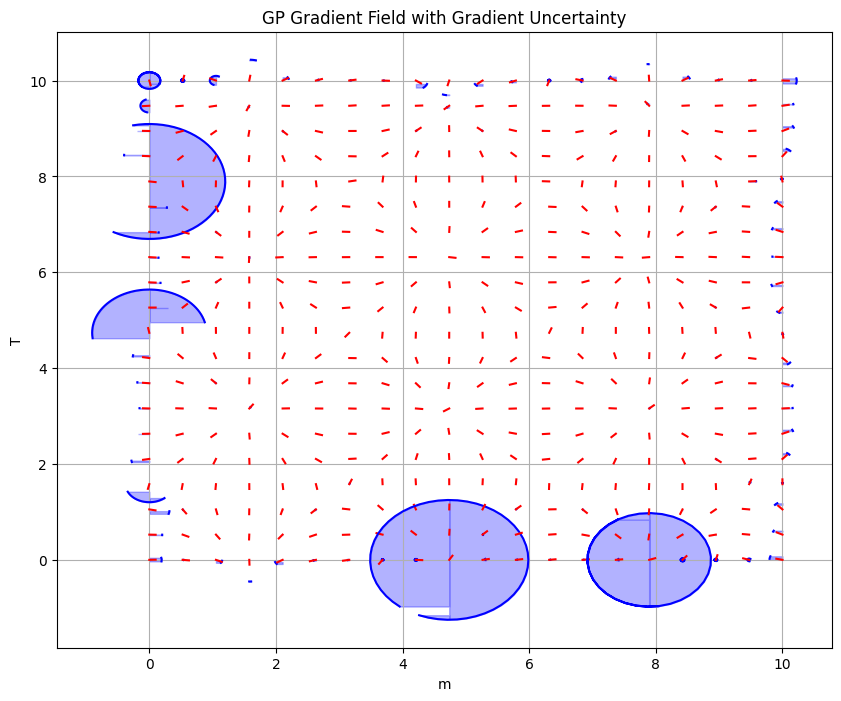

In [ ]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for demonstration
np.random.seed(42)
m_values = np.linspace(0, 10, 20)
T_values = np.linspace(0, 10, 20)
M, T = np.meshgrid(m_values, T_values)

# Example function with noise
true_function = lambda m, T: np.sin(m) * np.cos(T) + 0.1 * np.random.normal(size=m.shape)
data = true_function(M, T)

# Flatten for GP training
train_X = torch.tensor(np.column_stack((M.ravel(), T.ravel())), dtype=torch.float32)
train_y = torch.tensor(data.ravel(), dtype=torch.float32)

### --- Method 1: Gaussian Process with GPyTorch --- ###

# Define a simple GP model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_X, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_X, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Initialize model and likelihood
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_X, train_y, likelihood)

# Training
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(50):
    optimizer.zero_grad()
    output = model(train_X)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Evaluation Mode
model.eval()
likelihood.eval()

def compute_gp_gradient_field(model, m_values, T_values, num_samples=100):
    M, T = np.meshgrid(m_values, T_values)
    grad_m = np.zeros_like(M)
    grad_T = np.zeros_like(T)
    angle_uncertainty = np.zeros_like(T)
    radius_uncertainty = np.zeros_like(T)

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            x = torch.tensor([[M[j, i], T[j, i]]], dtype=torch.float32, requires_grad=True)
            posterior = model(x)
            samples = posterior.rsample(sample_shape=torch.Size([num_samples]))

            # Compute gradients for each sample
            gradients = []
            for sample in samples:
                sample.backward(retain_graph=True)
                gradient = x.grad.clone().detach().numpy().flatten()
                gradients.append(gradient)
                x.grad.zero_()

            gradients = np.array(gradients)

            # Convert to polar coordinates (r, theta)
            radii = np.linalg.norm(gradients, axis=1)
            angles = np.arctan2(gradients[:, 1], gradients[:, 0])
            mean_radius = np.mean(radii)
            mean_angle = np.mean(angles)

            # Compute uncertainties in polar coordinates
            radius_uncertainty[j, i] = 1.96 * np.std(radii)
            angle_uncertainty[j, i] = 1.96 * np.std(angles)

            # Convert back to Cartesian for plotting
            grad_m[j, i] = mean_radius * np.cos(mean_angle)
            grad_T[j, i] = mean_radius * np.sin(mean_angle)

    return grad_m, grad_T, angle_uncertainty, radius_uncertainty

# Compute the GP gradient field with uncertainty
grad_m_gp, grad_T_gp, angle_uncertainty_gp, radius_uncertainty_gp = compute_gp_gradient_field(model, m_values, T_values)

### --- Visualization Function for Cones with Gradient Uncertainty --- ###
def plot_cone_field(m_values, T_values, grad_m, grad_T, angle_unc, radius_unc, title="GP Gradient Field with Gradient Uncertainty"):
    M, T = np.meshgrid(m_values, T_values)
    magnitude = np.sqrt(grad_m**2 + grad_T**2)
    norm_grad_m = grad_m / (magnitude + 1e-8)
    norm_grad_T = grad_T / (magnitude + 1e-8)
    
    plt.figure(figsize=(10, 8))

    for i in range(len(m_values)):
        for j in range(len(T_values)):
            dx, dy = norm_grad_m[j, i], norm_grad_T[j, i]
            angle = np.arctan2(dy, dx)
            spread_angle = angle_unc[j, i]
            spread_radius = radius_unc[j, i] / magnitude[j, i]
            
            arc_angles = np.linspace(angle - spread_angle, angle + spread_angle, 50)
            arc_x = np.cos(arc_angles) * spread_radius
            arc_y = np.sin(arc_angles) * spread_radius
            
            plt.plot(M[j, i] + arc_x, T[j, i] + arc_y, color='blue')
            plt.plot([M[j, i], M[j, i] + dx * 0.1], [T[j, i], T[j, i] + dy * 0.1], color='red')
            plt.fill_betweenx(T[j, i] + arc_y, M[j, i], M[j, i] + arc_x, color='blue', alpha=0.3)
    
    plt.xlabel('m')
    plt.ylabel('T')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Visualize the Cone Plot for GP Gradient Uncertainty
plot_cone_field(m_values, T_values, grad_m_gp, grad_T_gp, angle_uncertainty_gp, radius_uncertainty_gp)